In [71]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt


In [72]:

data = pd.read_csv('Housing.csv')
data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [73]:
data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' ]] = data[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea' ]].map(lambda x : 1 if x.lower()=='yes' else 0)

data['furnishingstatus'] = data['furnishingstatus'].map(lambda x: 2 if x.lower() == 'furnished' 
                                                    else 1 if x.lower() == 'semi-furnished' 
                                                    else 0)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [74]:
max_price = data['price'].max()
min_price = data['price'].min()
data_normalized = data.copy()
def min_max_normalize(data) :
    # return (data-data.min()/ (data.max()-data.min()))
    for cols in data.columns :
        data[cols] = (data[cols] - data[cols].min())/ (data[cols].max()- data[cols].min())


min_max_normalize(data_normalized)
print(data_normalized)


        price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0    1.000000  0.396564       0.6   0.333333  0.666667       1.0        0.0   
1    0.909091  0.502405       0.6   1.000000  1.000000       1.0        0.0   
2    0.909091  0.571134       0.4   0.333333  0.333333       1.0        0.0   
3    0.906061  0.402062       0.6   0.333333  0.333333       1.0        0.0   
4    0.836364  0.396564       0.6   0.000000  0.333333       1.0        1.0   
..        ...       ...       ...        ...       ...       ...        ...   
540  0.006061  0.092784       0.2   0.000000  0.000000       1.0        0.0   
541  0.001485  0.051546       0.4   0.000000  0.000000       0.0        0.0   
542  0.000000  0.135395       0.2   0.000000  0.000000       1.0        0.0   
543  0.000000  0.086598       0.4   0.000000  0.000000       0.0        0.0   
544  0.000000  0.151203       0.4   0.000000  0.333333       1.0        0.0   

     basement  hotwaterheating  airconditioning   p

In [75]:
# splitting dataset

m , n = data.shape
data_shuffle = data_normalized.sample(frac = 1)
kagiri = int(0.8 * m)
data_train = data_shuffle[:kagiri]
data_test = data_shuffle[kagiri:]

# MAE dan MSE

def MSE(y_predict, y) :
    n = y.shape[0]
    return 1/n * (y_predict-y)**2

print(data_train.shape)
print(data_test.shape)

# forward pass
# backward pass
# semi-batch, stochastic, batch gd


(436, 13)
(109, 13)


In [76]:
# Initialize parameters
def init_params(n_neuron_hidden):
    W1 = np.random.randn(n_neuron_hidden, 12)
    b1 = np.random.randn(n_neuron_hidden, 1)
    W2 = np.random.randn(1, n_neuron_hidden)
    b2 = np.random.randn(1, 1)
    return W1, b1, W2, b2

# Leaky ReLU activation function
def ReLU(Z):
    return np.maximum(0, Z)

# Derivative of ReLU
def dReLU(Z):
    return Z>0

# Forward propagation
def forward_prop(W1, b1, W2, b2, X) :
    X = X.T
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Z2  # Linear activation for regression
    # print("X : ", X.shape)
    # print("W1 : ", W1.shape)
    # print("b1 : ", b1.shape)
    # print("A1 : ", A1.shape)
    # print("W2 : ", W2.shape)
    # print("b2 : ", b2.shape)
    # print("A2 : ", A2.shape)
    return Z1, A1, Z2, A2

# MSE Loss function
# def mse_loss(Y, A2):
#     m = Y.shape[0]
#     loss = np.mean((A2 - Y) ** 2) 
#     return loss
# def mae_loss(Y, A2):
#     # Ensure Y and A2 are 1D arrays
#     Y = Y.ravel()
#     A2 = A2.ravel()
#     loss = np.mean(np.abs(A2 - Y))
#     return loss
def mse_loss(Y, A2):
    # Ensure Y and A2 are the same shape
    Y = Y.reshape(A2.shape)
    return np.mean((A2 - Y) ** 2)

def mae_loss(Y, A2):
    # Ensure Y and A2 are the same shape
    Y = Y.reshape(A2.shape)
    return np.mean(np.abs(A2 - Y))

# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, loss_function):
    m = X.shape[0]
    Y = Y.reshape(1, -1)  # Reshape Y to (1, m)
    
    if loss_function == 'mse':
        dZ2 = A2 - Y
    elif loss_function == 'mae':
        dZ2 = np.sign(A2 - Y)
    else:
        raise ValueError("Invalid loss function. Choose 'mse' or 'mae'.")
    
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = W2.T.dot(dZ2)
    dZ1 = dA1 * dReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Implementing different gradient descent strategies

# Unified gradient descent function
def gradient_descent(X, Y, W1, b1, W2, b2, learning_rate, iterations, batch_type='batch', batch_size=32, loss_function='mse'):
    m = X.shape[0]  # Number of examples
    history = []
    
    for i in range(iterations):
        if batch_type == 'batch':
            # Batch Gradient Descent
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
            loss = mse_loss(Y, A2) if loss_function == 'mse' else mae_loss(Y, A2)
            dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y, loss_function)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        elif batch_type == 'mini-batch':
            # Mini-batch Gradient Descent
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]
            
            for k in range(0, m, batch_size):
                X_mini = X_shuffled[k:k+batch_size]
                Y_mini = Y_shuffled[k:k+batch_size]
                Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_mini)
                loss = mse_loss(Y_mini, A2) if loss_function == 'mse' else mae_loss(Y_mini, A2)
                dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_mini, Y_mini, loss_function)
                W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        elif batch_type == 'sgd':
            # Stochastic Gradient Descent (SGD)
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]
            
            for k in range(m):
                X_single = X_shuffled[k:k+1]
                Y_single = Y_shuffled[k:k+1]
                Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_single)
                loss = mse_loss(Y_single, A2) if loss_function == 'mse' else mae_loss(Y_single, A2)
                dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_single, Y_single, loss_function)
                W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        history.append(loss)
        
        if i % 10 == 0:
            print(f"Iteration {i} - Loss: {loss}")
    
    return W1, b1, W2, b2, history


def predict(W1, b1, W2, b2, X):
     # Ensure X is 2D: if it's a single sample, reshape it
    if X.ndim == 1:
        X = X.reshape(1, -1)
    # Perform forward propagation with trained weights and biases
    Z1 = W1.dot(X.T) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Z2  # Linear activation for regression output
    return A2.T


In [77]:
X_tr = data_train.drop(columns=['price']).values # Input data with 100 examples and 12 features
Y_tr = data_train['price'].values   # Output data (continuous values for regression)


print(X_tr.shape)
print(Y_tr.shape)
print(X_tr)
# Initialize parameters
W1, b1, W2, b2 = init_params(50)

# Train the network with mini-batch gradient descent
# W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=10000, batch_type='mini-batch', batch_size=32)


# W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=10000, batch_type='batch')

# W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=1000, batch_type='sgd')



(436, 12)
(436,)
[[0.13402062 0.4        0.         ... 0.33333333 0.         0.        ]
 [0.19656357 0.6        0.33333333 ... 0.         0.         0.5       ]
 [0.40082474 0.4        0.33333333 ... 0.33333333 1.         1.        ]
 ...
 [0.28522337 0.4        0.         ... 0.66666667 0.         0.5       ]
 [0.24054983 0.4        0.33333333 ... 0.66666667 0.         0.5       ]
 [0.32371134 0.6        0.33333333 ... 0.66666667 1.         1.        ]]


In [78]:
X_test = data_test.drop(columns=['price']).values
Y_test = data_test['price'].values

# print(X_test[1])
# harga = predict(W1, b1, W2, b2, X_test[1].reshape(-1, 1))
# print(harga.shape)
# print(harga)
# print(Y_test[1])
# harga = predict(W1, b1, W2, b2, X_test)

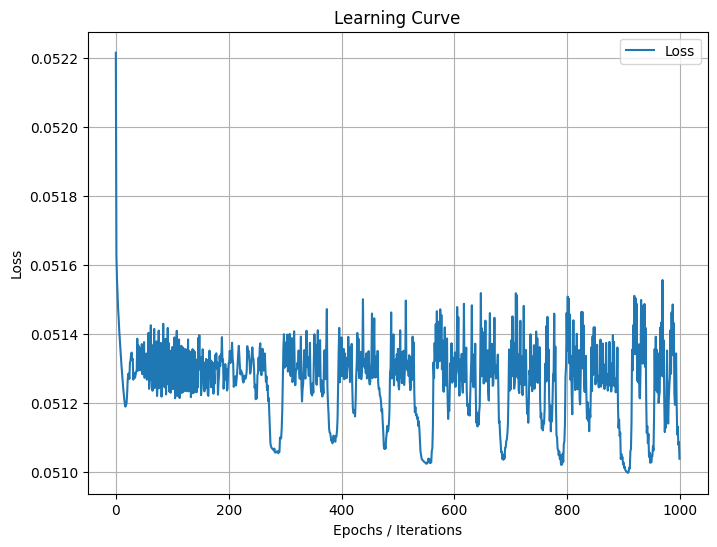

In [79]:


# Assuming loss_history is your array with loss values over epochs/iterations
# For example: loss_history = [0.5, 0.4, 0.35, 0.3, ...]

def plot_learning_curve(loss_history):
    plt.figure(figsize=(8, 6))
    
    # Plot loss vs. iterations/epochs
    plt.plot(loss_history, label='Loss')
    
    # Adding labels and title
    plt.xlabel('Epochs / Iterations')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    
    # Optional: Add a grid and legend for better visualization
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.show()

# Assuming loss_history is already populated
plot_learning_curve(loss_history)


# Stochastic Gradient Descent with MSE 

Iteration 0 - Loss: 0.795420716085598
Iteration 10 - Loss: 0.06112974060560887
Iteration 20 - Loss: 0.17438024223233586
Iteration 30 - Loss: 0.001290862758634571
Iteration 40 - Loss: 0.012107671072352114
Iteration 50 - Loss: 0.03277529163155172
Iteration 60 - Loss: 0.03159928445182088
Iteration 70 - Loss: 0.17049800944706478
Iteration 80 - Loss: 0.002124133710273079
Iteration 90 - Loss: 0.025347677585924794
Iteration 100 - Loss: 0.07705098024964299
Iteration 110 - Loss: 0.05768718161491762
Iteration 120 - Loss: 0.0015618575033084015
Iteration 130 - Loss: 0.0032379330840228665
Iteration 140 - Loss: 0.5481643370615108
Iteration 150 - Loss: 0.0024380551257022305
Iteration 160 - Loss: 0.018942453388910162
Iteration 170 - Loss: 0.0001480116859435279
Iteration 180 - Loss: 0.02585019150515763
Iteration 190 - Loss: 0.005313733920125729
Iteration 200 - Loss: 0.0016181248287512168
Iteration 210 - Loss: 3.3091846270005725e-07
Iteration 220 - Loss: 0.016130421288980186
Iteration 230 - Loss: 0.0004

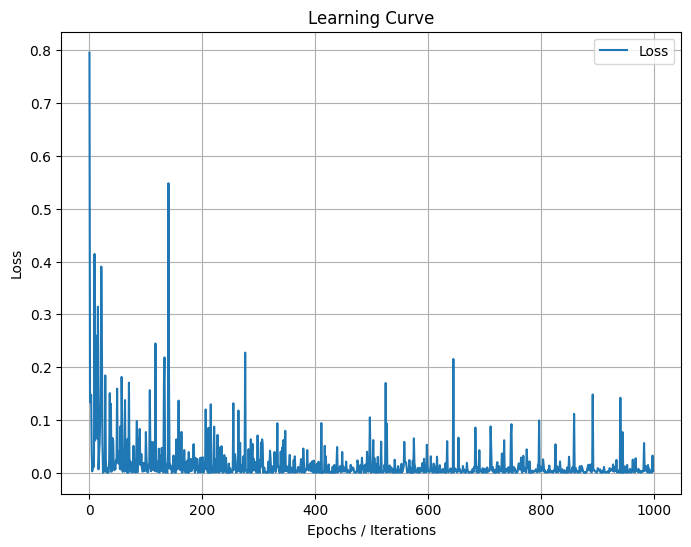

In [80]:

W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=1000, batch_type='sgd', loss_function='mse')
harga = predict(W1, b1, W2, b2, X_test)
plot_learning_curve(loss_history)


# Stochastic Gradient Descent with MAE

Iteration 0 - Loss: 0.14521684119583128
Iteration 10 - Loss: 0.06693120933241398
Iteration 20 - Loss: 0.06402445777266336
Iteration 30 - Loss: 0.12351610551894349
Iteration 40 - Loss: 0.30270290167714853
Iteration 50 - Loss: 0.003779421885327955
Iteration 60 - Loss: 0.0687236662292619
Iteration 70 - Loss: 0.13287783689645133
Iteration 80 - Loss: 0.17998153285273188
Iteration 90 - Loss: 0.060688396102631215
Iteration 100 - Loss: 0.01507901993169676
Iteration 110 - Loss: 0.16062355593554223
Iteration 120 - Loss: 0.13195501184459918
Iteration 130 - Loss: 0.15905806666296393
Iteration 140 - Loss: 0.06565346670947902
Iteration 150 - Loss: 0.10151235445307627
Iteration 160 - Loss: 0.08078466693157241
Iteration 170 - Loss: 0.28372639881750533
Iteration 180 - Loss: 0.01442704617425733
Iteration 190 - Loss: 0.04685819751938161
Iteration 200 - Loss: 0.17195053283921197
Iteration 210 - Loss: 0.10931951064359571
Iteration 220 - Loss: 0.07942989612423085
Iteration 230 - Loss: 0.023520913265618365
I

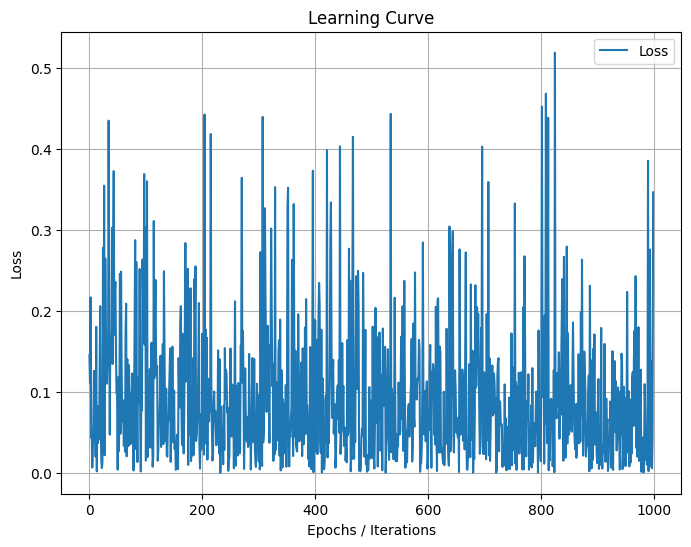

In [81]:

W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=1000, batch_type='sgd', loss_function='mae')
harga = predict(W1, b1, W2, b2, X_test)
plot_learning_curve(loss_history)


# Mini-Batch Gradient Descent with MSE

Iteration 0 - Loss: 0.011683994401203048
Iteration 10 - Loss: 0.006667310106786765
Iteration 20 - Loss: 0.00356176916352617
Iteration 30 - Loss: 0.0024510019172747843
Iteration 40 - Loss: 0.005870886568800073
Iteration 50 - Loss: 0.003415826051765807
Iteration 60 - Loss: 0.00895100582336103
Iteration 70 - Loss: 0.0028897538612591717
Iteration 80 - Loss: 0.009328939720692814
Iteration 90 - Loss: 0.00808332876858259
Iteration 100 - Loss: 0.003765526641872589
Iteration 110 - Loss: 0.008035975388759397
Iteration 120 - Loss: 0.0028795327555946747
Iteration 130 - Loss: 0.0018540948994355047
Iteration 140 - Loss: 0.0019989482182850653
Iteration 150 - Loss: 0.011784228076178625
Iteration 160 - Loss: 0.0024800996283011094
Iteration 170 - Loss: 0.005772514307269899
Iteration 180 - Loss: 0.006888767597283481
Iteration 190 - Loss: 0.006456028090933102
Iteration 200 - Loss: 0.006817529873074403
Iteration 210 - Loss: 0.005949684435434626
Iteration 220 - Loss: 0.004667875957827355
Iteration 230 - Los

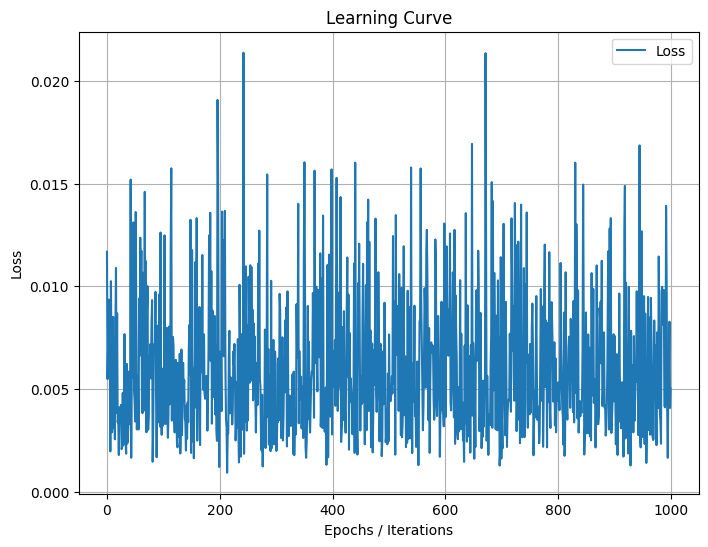

In [82]:

W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=1000, batch_type='mini-batch', loss_function='mse')
harga = predict(W1, b1, W2, b2, X_test)
plot_learning_curve(loss_history)


# Mini-Batch Gradient Descent with MAE

Iteration 0 - Loss: 0.0592924762518852
Iteration 10 - Loss: 0.051860815385983805
Iteration 20 - Loss: 0.05166653770929151
Iteration 30 - Loss: 0.06761859012743507
Iteration 40 - Loss: 0.049248443188473774
Iteration 50 - Loss: 0.04055189445103012
Iteration 60 - Loss: 0.05549974574431728
Iteration 70 - Loss: 0.04191371751909073
Iteration 80 - Loss: 0.04164777786326943
Iteration 90 - Loss: 0.04575082294411911
Iteration 100 - Loss: 0.08870366410458932
Iteration 110 - Loss: 0.044733249656873905
Iteration 120 - Loss: 0.06957425289764
Iteration 130 - Loss: 0.06090958896242595
Iteration 140 - Loss: 0.06798188668846704
Iteration 150 - Loss: 0.05934215595251009
Iteration 160 - Loss: 0.061429378716311475
Iteration 170 - Loss: 0.039602832525005086
Iteration 180 - Loss: 0.060768206505923364
Iteration 190 - Loss: 0.04197220209662009
Iteration 200 - Loss: 0.03818531851631578
Iteration 210 - Loss: 0.045850600677050886
Iteration 220 - Loss: 0.057854382461256425
Iteration 230 - Loss: 0.05717385836141758

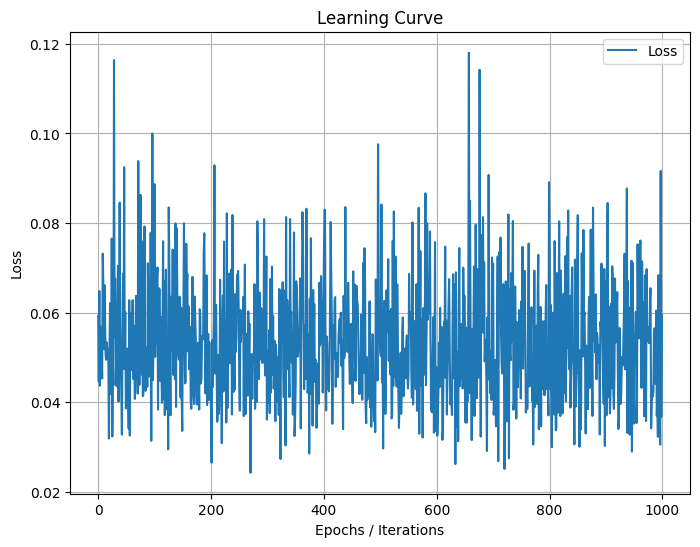

In [83]:

W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=1000, batch_type='mini-batch', loss_function='mae')
harga = predict(W1, b1, W2, b2, X_test)
plot_learning_curve(loss_history)


# Batch Gradient Descent with MSE

Iteration 0 - Loss: 0.006234899685318919
Iteration 10 - Loss: 0.006230063183771373
Iteration 20 - Loss: 0.0062261590685751605
Iteration 30 - Loss: 0.006222735461225231
Iteration 40 - Loss: 0.006219630086816598
Iteration 50 - Loss: 0.006216776236175388
Iteration 60 - Loss: 0.006214139571113399
Iteration 70 - Loss: 0.0062116971769997
Iteration 80 - Loss: 0.006209430849674152
Iteration 90 - Loss: 0.006207325036783543
Iteration 100 - Loss: 0.006205365847695918
Iteration 110 - Loss: 0.006203540707351132
Iteration 120 - Loss: 0.006201838175035061
Iteration 130 - Loss: 0.006200247822946247
Iteration 140 - Loss: 0.006198760139776884
Iteration 150 - Loss: 0.006197366447488979
Iteration 160 - Loss: 0.006196058826987219
Iteration 170 - Loss: 0.006194830050879337
Iteration 180 - Loss: 0.006193673522361855
Iteration 190 - Loss: 0.006192583219578244
Iteration 200 - Loss: 0.006191553644927487
Iteration 210 - Loss: 0.006190579778871257
Iteration 220 - Loss: 0.006189657037835939
Iteration 230 - Loss: 0

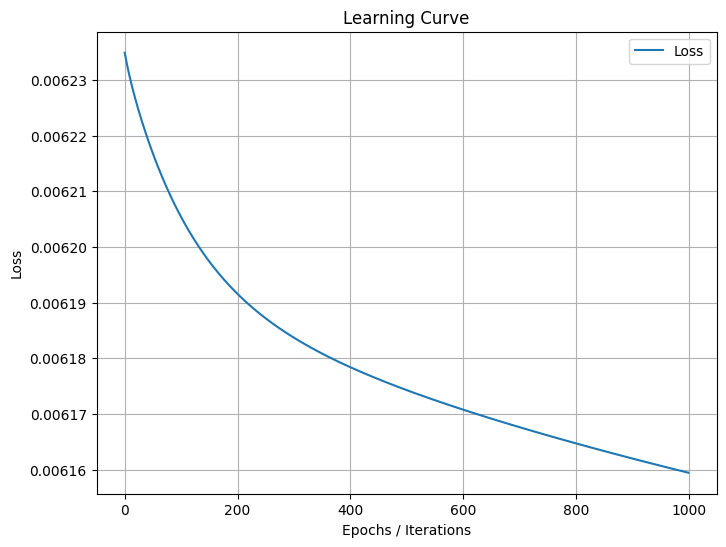

In [84]:

W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=1000, batch_type='batch', loss_function='mse')
harga = predict(W1, b1, W2, b2, X_test)
plot_learning_curve(loss_history)


# Batch Gradient Descent with MAE

Iteration 0 - Loss: 0.05242885638672889
Iteration 10 - Loss: 0.051861688020911366
Iteration 20 - Loss: 0.051803858578668406
Iteration 30 - Loss: 0.05176720731248592
Iteration 40 - Loss: 0.05177242864987184
Iteration 50 - Loss: 0.051786627344411085
Iteration 60 - Loss: 0.05173605309343682
Iteration 70 - Loss: 0.05174159880383688
Iteration 80 - Loss: 0.05175395601951432
Iteration 90 - Loss: 0.051736331987902305
Iteration 100 - Loss: 0.05174953502935256
Iteration 110 - Loss: 0.05173138548156241
Iteration 120 - Loss: 0.051720915802999805
Iteration 130 - Loss: 0.05173058104500492
Iteration 140 - Loss: 0.051728517582239494
Iteration 150 - Loss: 0.05173760918893611
Iteration 160 - Loss: 0.0517064960038339
Iteration 170 - Loss: 0.051731133626400284
Iteration 180 - Loss: 0.0517306338469287
Iteration 190 - Loss: 0.051717248984400735
Iteration 200 - Loss: 0.051724423458274965
Iteration 210 - Loss: 0.051731961577108646
Iteration 220 - Loss: 0.05171884421445025
Iteration 230 - Loss: 0.0517265050553

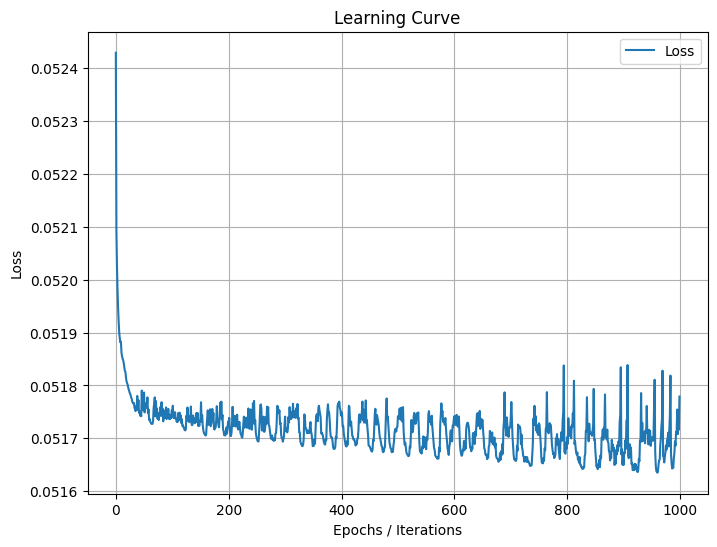

In [85]:

W1, b1, W2, b2, loss_history = gradient_descent(X_tr, Y_tr, W1, b1, W2, b2, learning_rate=0.001, iterations=1000, batch_type='batch', loss_function='mae')
harga = predict(W1, b1, W2, b2, X_test)
plot_learning_curve(loss_history)
